In [ ]:
import pandas as pd
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Activation,Layer,Lambda


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving forestfires.csv to forestfires.csv


In [ ]:

forestfires = pd.read_csv("forestfires.csv", delimiter=",")

In [ ]:
forestfires.head(5)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small


**Perform Initial EDA**


In [ ]:
forestfires.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [ ]:
### month and day variables are already existing, drop the one hot encoded values as they are creating large no. variables
##Dropping the one hot encoded  month and day columns
forestfires.drop(["monthapr","monthaug","monthdec","monthfeb","monthjan","monthjul","monthjun","monthmar","monthmay","monthnov","monthoct","monthsep","dayfri","daymon","daysat","daysun","daythu","daytue","daywed"],axis=1,inplace =True)

In [ ]:
forestfires.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 48.6+ KB


In [ ]:
forestfires[forestfires.duplicated()]


,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,0.00,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,0.00,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,28.66,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,0.00,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,0.00,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,0.00,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,0.00,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00,small


In [ ]:
### There are 8 duplicated rows Identified,drop the records
forestfires=forestfires.drop_duplicates()

In [ ]:
forestfires[forestfires.duplicated()]


,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category


Visualizations¶


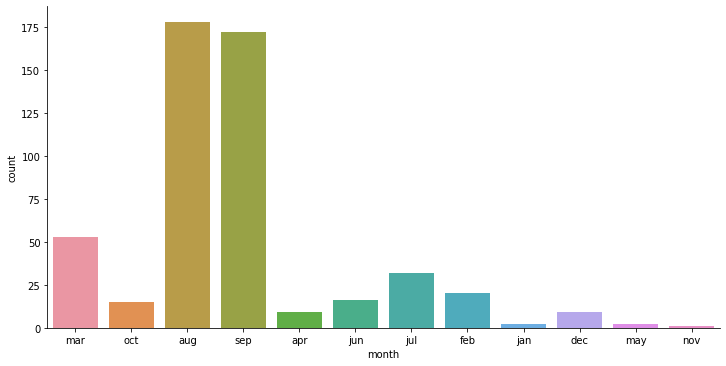

In [ ]:
#use seaborn to plot the count of each 12 months
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")
sns.factorplot('month', data=forestfires, kind="count",size = 5,aspect = 2)

Most of the fires have taken place in aug and sep months¶


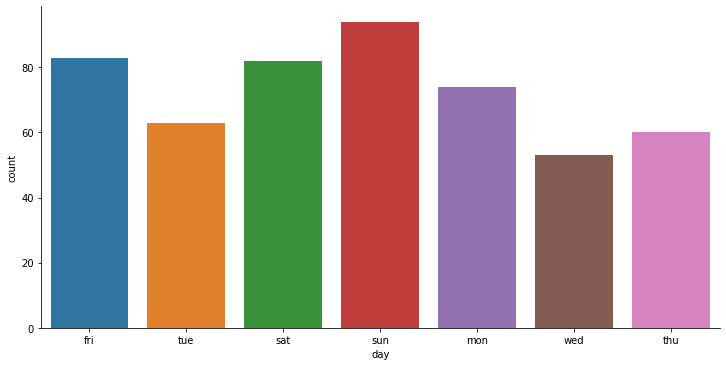

In [ ]:
sns.factorplot('day', data=forestfires, kind="count",size = 5,aspect = 2)


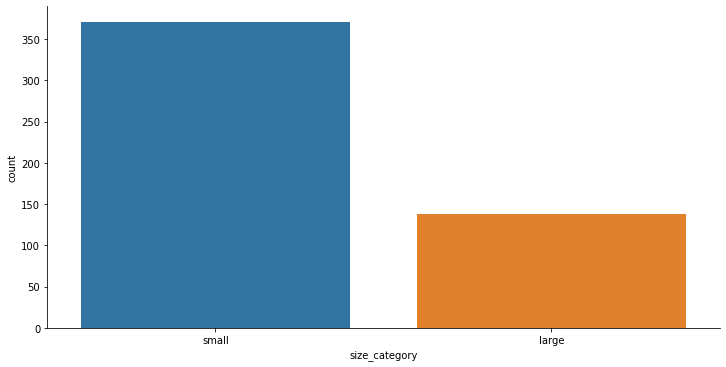

In [ ]:
sns.factorplot('size_category', data=forestfires, kind="count",size = 5,aspect = 2)


**Forest** **fires mostly occured are small in size¶**

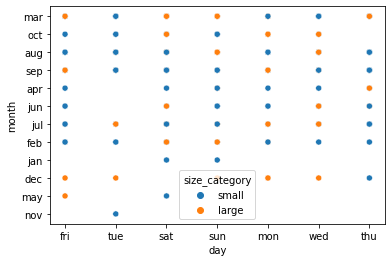

In [ ]:
sns.scatterplot(forestfires['day'],forestfires['month'],hue=forestfires['size_category'])


In [ ]:
## most of the forest fires occured in fridays and large size forest fires mostly occured in march and december months¶


In [ ]:
forestfires.size_category.unique()


array(['small', 'large'], dtype=object)

In [ ]:
##As, the model cannot be applied directly on object data we need to encode this object variables
def encode_labels(dataset):
    from sklearn import preprocessing 
    le = preprocessing.LabelEncoder()
    for column_name in dataset.columns:
        if dataset[column_name].dtype == object:
            dataset[column_name] = le.fit_transform(dataset[column_name])
        else:
            pass

In [ ]:
encode_labels(forestfires)


In [ ]:
forestfires.head()


,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


In [ ]:
#### 0 - Indicates large size forest fires and 1 includes smal size¶


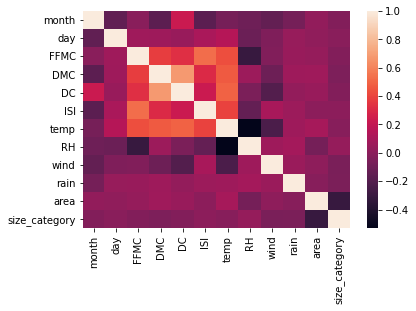

In [ ]:
cor = forestfires.corr()
sns.heatmap(cor)

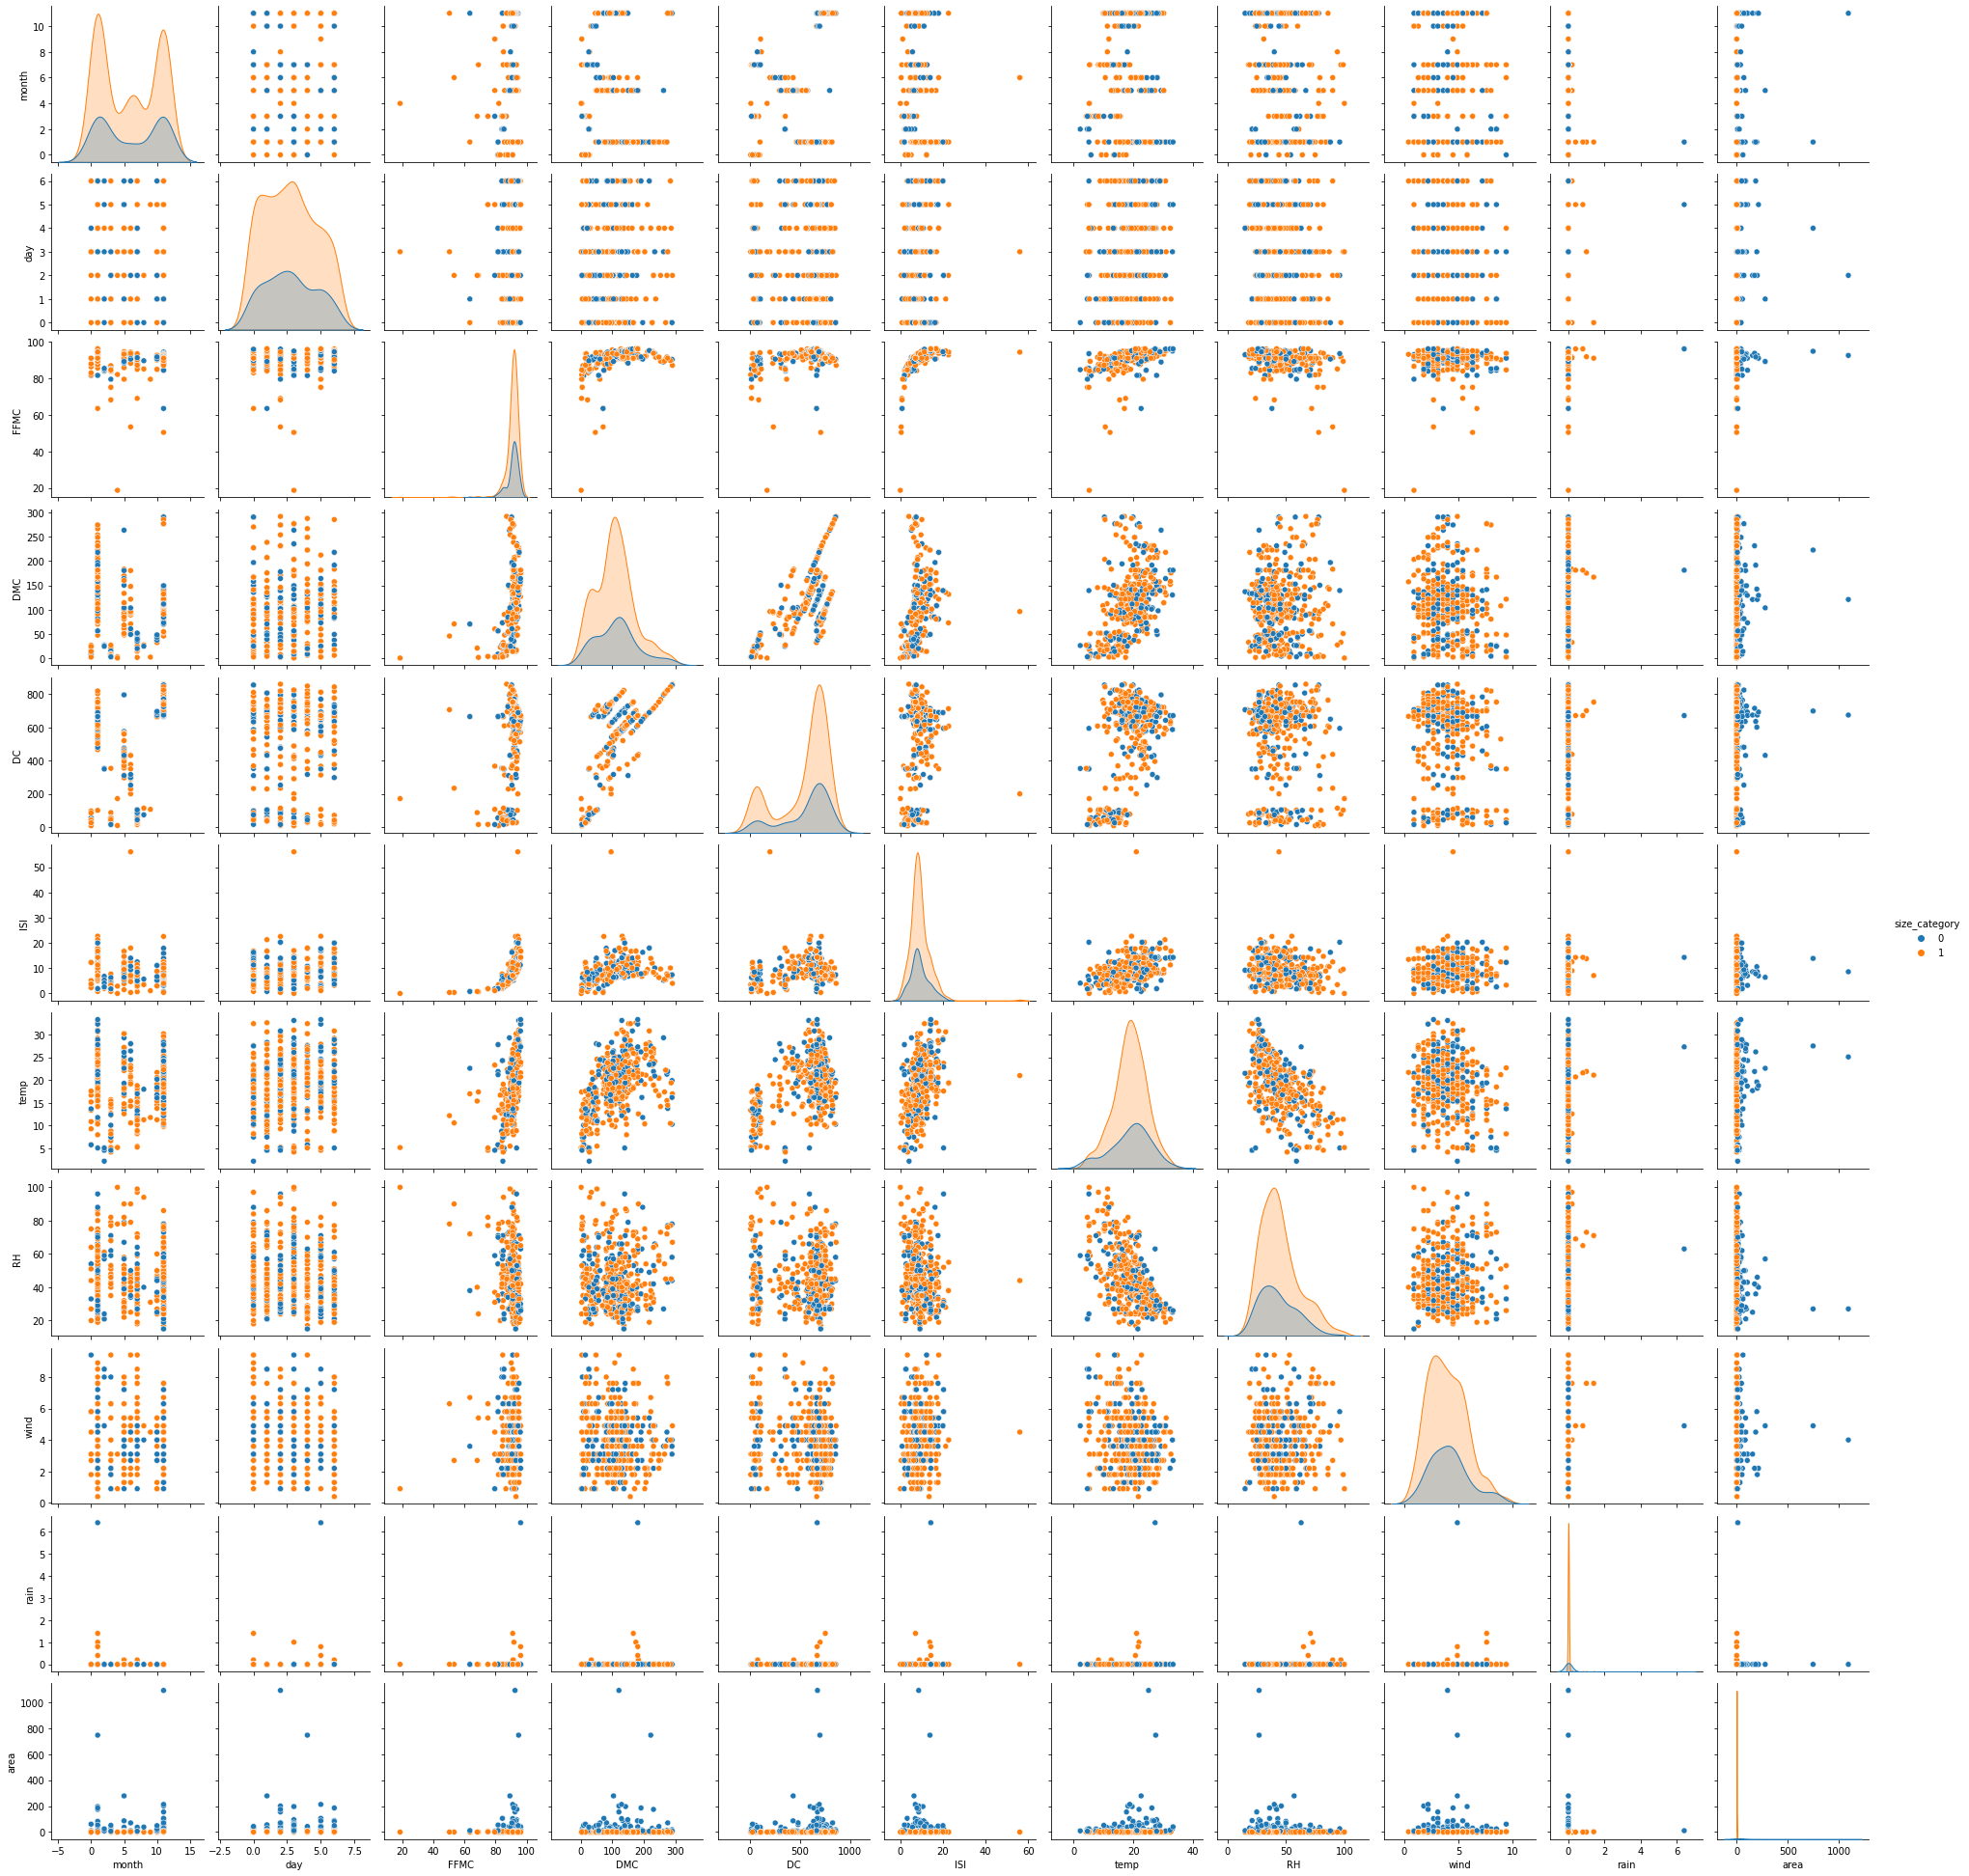

In [ ]:
#pairwise plot of all the features
import warnings 
warnings.filterwarnings("ignore")
sns.pairplot(forestfires,hue='size_category')
plt.show()

## Feature Scaling¶
#### Normalising the data as there is scale difference¶


In [ ]:
predictors = forestfires.iloc[:,0:11]
target = forestfires.iloc[:,11]

In [ ]:
def norm_func(i):
    x= (i-i.min())/(i.max()-i.min())
    return (x)

In [ ]:
### We should normalize Input variables 
fires=norm_func(predictors)
fires

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,0.636364,0.000000,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.000000
1,0.909091,0.833333,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.000000
2,0.909091,0.333333,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.000000
3,0.636364,0.000000,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.000000
4,0.636364,0.500000,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
512,0.090909,0.500000,0.811613,0.191592,0.771315,0.033868,0.823151,0.200000,0.255556,0.00000,0.005904
513,0.090909,0.500000,0.811613,0.191592,0.771315,0.033868,0.633441,0.658824,0.600000,0.00000,0.049769
514,0.090909,0.500000,0.811613,0.191592,0.771315,0.033868,0.610932,0.647059,0.700000,0.00000,0.010231
515,0.090909,0.333333,0.976774,0.499311,0.711622,0.201426,0.752412,0.317647,0.400000,0.00000,0.000000


In [ ]:
X = fires.values
Y = target.values

In [ ]:
### Implementing the model

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X,Y, test_size=0.3,stratify = Y)

In [ ]:
x_train = x_train.astype('float32') / 255
y_train = y_train.astype('float32') / 255

In [ ]:
#### Tuning of Hyperparameters :- Batch Size and Epochs

In [ ]:
# Importing the necessary packages
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam

In [ ]:
# create model
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=11, activation='relu'))
    model.add(Dense(8,  activation='relu'))
    model.add(Dense(1,  activation='sigmoid'))
    
    adam=Adam(lr=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [ ]:
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0)
# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)


In [ ]:
grid_result = grid.fit(fires,target)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............ batch_size=10, epochs=10, score=1.000, total=  15.6s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.6s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.765, total=   1.6s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   17.2s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.510, total=   1.7s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   18.8s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.686, total=   1.7s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   20.6s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.713, total=   1.8s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   22.3s remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=1.000, total=   3.7s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   26.0s remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=0.912, total=   3.6s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   29.6s remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=0.931, total=   3.3s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   32.9s remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=0.941, total=   3.2s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   36.2s remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=0.911, total=   3.3s
[CV] batch_size=10, epochs=100 .......................................
[CV] ........... batch_size=10, epochs=100, score=0.990, total=   6.2s
[CV] batch_size=10, epochs=100 .......................................
[CV] ........... batch_size=10, epochs=100, score=0.941, total=   5.4s
[CV] batch_size=10, epochs=100 .......................................
[CV] ........... batch_size=10, epochs=100, score=0.971, total=   6.2s
[CV] batch_size=10, epochs=100 .......................................
[CV] ........... batch_size=10, epochs=100, score=0.951, total=   5.3s
[CV] batch_size=10, epochs=100 .......................................
[CV] ........... batch_size=10, epochs=100, score=0.941, total=   6.3s
[CV] batch_size=20, epochs=10 ........................................
[CV] ............ batch_size=20, epochs=10, score=1.000, total=   1.4s
[CV] batch_size=20, epochs=10 ........................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  2.2min finished


In [ ]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9587070345878601, using {'batch_size': 10, 'epochs': 100}
0.734731137752533,0.15791402077274957 with: {'batch_size': 10, 'epochs': 10}
0.9390409588813782,0.032606070027249634 with: {'batch_size': 10, 'epochs': 50}
0.9587070345878601,0.01911973589902788 with: {'batch_size': 10, 'epochs': 100}
0.7347505450248718,0.15836388454198755 with: {'batch_size': 20, 'epochs': 10}
0.9567268490791321,0.029595578546896515 with: {'batch_size': 20, 'epochs': 50}
0.9508444905281067,0.02982747323735679 with: {'batch_size': 20, 'epochs': 100}
0.728809940814972,0.1592563941055272 with: {'batch_size': 40, 'epochs': 10}
0.842651903629303,0.0911822106089689 with: {'batch_size': 40, 'epochs': 50}
0.9190060019493103,0.11574205189437314 with: {'batch_size': 40, 'epochs': 100}


In [ ]:
#### Tuning of Hyperparameters:- Learning rate and Drop out 


In [ ]:
from keras.layers import Dropout

# Defining the model

def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(8,input_dim = 11,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(4,input_dim = 11,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 100)

# Define the grid search parameters

learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)



In [ ]:
grid_result = grid.fit(fires,target)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] dropout_rate=0.0, learning_rate=0.001 ...........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  dropout_rate=0.0, learning_rate=0.001, score=1.000, total=   5.4s
[CV] dropout_rate=0.0, learning_rate=0.001 ...........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.5s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.001, score=0.765, total=   4.9s
[CV] dropout_rate=0.0, learning_rate=0.001 ...........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.4s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.001, score=0.569, total=   4.9s
[CV] dropout_rate=0.0, learning_rate=0.001 ...........................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   15.3s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.001, score=0.676, total=   4.8s
[CV] dropout_rate=0.0, learning_rate=0.001 ...........................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   20.2s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.001, score=0.772, total=   6.4s
[CV] dropout_rate=0.0, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   26.5s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.01, score=1.000, total=   6.3s
[CV] dropout_rate=0.0, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   32.8s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.01, score=0.980, total=   6.3s
[CV] dropout_rate=0.0, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   39.1s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.01, score=1.000, total=   4.9s
[CV] dropout_rate=0.0, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   44.1s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.01, score=0.853, total=   5.3s
[CV] dropout_rate=0.0, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   49.3s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.01, score=0.693, total=   4.9s
[CV] dropout_rate=0.0, learning_rate=0.1 .............................
[CV] . dropout_rate=0.0, learning_rate=0.1, score=1.000, total=   5.0s
[CV] dropout_rate=0.0, learning_rate=0.1 .............................
[CV] . dropout_rate=0.0, learning_rate=0.1, score=0.765, total=   6.3s
[CV] dropout_rate=0.0, learning_rate=0.1 .............................
[CV] . dropout_rate=0.0, learning_rate=0.1, score=0.510, total=   4.8s
[CV] dropout_rate=0.0, learning_rate=0.1 .............................
[CV] . dropout_rate=0.0, learning_rate=0.1, score=0.676, total=   6.3s
[CV] dropout_rate=0.0, learning_rate=0.1 .............................
[CV] . dropout_rate=0.0, learning_rate=0.1, score=0.693, total=   4.9s
[CV] dropout_rate=0.1, learning_rate=0.001 ...........................
[CV]  dropout_rate=0.1, learning_rate=0.001, score=1.000, total=   6.4s
[CV] dropout_rate=0.1, learning_rate=0.001 ...........................
[CV] 

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  4.3min finished


In [ ]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9565909504890442, using {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.7564162373542785,0.14234413670734294 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.9052805185317994,0.11946408477730286 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.728809940814972,0.1592563941055272 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.7623374223709106,0.15584866666140446 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.9565909504890442,0.04919122796367797 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.728809940814972,0.1592563941055272 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.728809940814972,0.1592563941055272 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.7763347029685974,0.1760678228666962 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.728809940814972,0.1592563941055272 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


In [ ]:
#### Tuning of Hyperparameters:- Activation Function and Kernel Initializer

In [ ]:
# Defining the model

def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(8,input_dim = 11,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(4,input_dim = 11,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.01)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 100)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)


In [ ]:
grid_result = grid.fit(fires,target)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] activation_function=softmax, init=uniform .......................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  activation_function=softmax, init=uniform, score=1.000, total=   5.7s
[CV] activation_function=softmax, init=uniform .......................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.7s remaining:    0.0s


[CV]  activation_function=softmax, init=uniform, score=0.912, total=   6.5s
[CV] activation_function=softmax, init=uniform .......................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   12.2s remaining:    0.0s


[CV]  activation_function=softmax, init=uniform, score=0.873, total=   6.5s
[CV] activation_function=softmax, init=uniform .......................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   18.7s remaining:    0.0s


[CV]  activation_function=softmax, init=uniform, score=0.931, total=   6.4s
[CV] activation_function=softmax, init=uniform .......................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   25.1s remaining:    0.0s


[CV]  activation_function=softmax, init=uniform, score=0.851, total=   5.6s
[CV] activation_function=softmax, init=normal ........................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   30.7s remaining:    0.0s


[CV]  activation_function=softmax, init=normal, score=1.000, total=   5.6s
[CV] activation_function=softmax, init=normal ........................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   36.3s remaining:    0.0s


[CV]  activation_function=softmax, init=normal, score=0.902, total=   5.5s
[CV] activation_function=softmax, init=normal ........................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   41.8s remaining:    0.0s


[CV]  activation_function=softmax, init=normal, score=0.941, total=   5.9s
[CV] activation_function=softmax, init=normal ........................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   47.7s remaining:    0.0s


[CV]  activation_function=softmax, init=normal, score=0.941, total=   6.4s
[CV] activation_function=softmax, init=normal ........................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   54.1s remaining:    0.0s


[CV]  activation_function=softmax, init=normal, score=0.871, total=   6.4s
[CV] activation_function=softmax, init=zero ..........................
[CV]  activation_function=softmax, init=zero, score=1.000, total=   5.4s
[CV] activation_function=softmax, init=zero ..........................
[CV]  activation_function=softmax, init=zero, score=0.902, total=   5.3s
[CV] activation_function=softmax, init=zero ..........................
[CV]  activation_function=softmax, init=zero, score=0.873, total=   6.4s
[CV] activation_function=softmax, init=zero ..........................
[CV]  activation_function=softmax, init=zero, score=0.922, total=   6.4s
[CV] activation_function=softmax, init=zero ..........................
[CV]  activation_function=softmax, init=zero, score=0.921, total=   7.0s
[CV] activation_function=relu, init=uniform ..........................
[CV]  activation_function=relu, init=uniform, score=1.000, total=   5.5s
[CV] activation_function=relu, init=uniform .................

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  5.9min finished


In [ ]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9802756667137146, using {'activation_function': 'linear', 'init': 'uniform'}
0.9134342670440674,0.05162847109436599 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.9311201691627502,0.04330578319281702 with: {'activation_function': 'softmax', 'init': 'normal'}
0.9233741044998169,0.04224494257783035 with: {'activation_function': 'softmax', 'init': 'zero'}
0.885672676563263,0.11409543880194019 with: {'activation_function': 'relu', 'init': 'uniform'}
0.9174917459487915,0.0814541961515467 with: {'activation_function': 'relu', 'init': 'normal'}
0.728809940814972,0.1592563941055272 with: {'activation_function': 'relu', 'init': 'zero'}
0.9703940868377685,0.03599359008302637 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.9547078251838684,0.03404011870792322 with: {'activation_function': 'tanh', 'init': 'normal'}
0.728809940814972,0.1592563941055272 with: {'activation_function': 'tanh', 'init': 'zero'}
0.9802756667137146,0.022560975424534307 with: {'activation_

In [ ]:
# This is formatted as code

In [ ]:
# Defining the model

def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 11,kernel_initializer = 'uniform',activation = 'linear'))
    model.add(Dropout(0.1))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'linear'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.01)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 100)

# Define the grid search parameters

neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)


In [ ]:
grid_result = grid.fit(fires,target)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] neuron1=4, neuron2=2 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................ neuron1=4, neuron2=2, score=1.000, total=   5.1s
[CV] neuron1=4, neuron2=2 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.1s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=2, score=1.000, total=   6.8s
[CV] neuron1=4, neuron2=2 ............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   11.9s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=2, score=1.000, total=   6.4s
[CV] neuron1=4, neuron2=2 ............................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   18.3s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=2, score=0.961, total=   6.4s
[CV] neuron1=4, neuron2=2 ............................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   24.6s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=2, score=0.960, total=   5.1s
[CV] neuron1=4, neuron2=4 ............................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   29.8s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=4, score=1.000, total=   6.4s
[CV] neuron1=4, neuron2=4 ............................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   36.2s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=4, score=0.980, total=   6.4s
[CV] neuron1=4, neuron2=4 ............................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   42.5s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=4, score=1.000, total=   5.1s
[CV] neuron1=4, neuron2=4 ............................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   47.6s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=4, score=0.922, total=   6.4s
[CV] neuron1=4, neuron2=4 ............................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   54.0s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=4, score=0.980, total=   6.3s
[CV] neuron1=4, neuron2=8 ............................................
[CV] ................ neuron1=4, neuron2=8, score=1.000, total=   5.1s
[CV] neuron1=4, neuron2=8 ............................................
[CV] ................ neuron1=4, neuron2=8, score=0.971, total=   6.8s
[CV] neuron1=4, neuron2=8 ............................................
[CV] ................ neuron1=4, neuron2=8, score=1.000, total=   5.1s
[CV] neuron1=4, neuron2=8 ............................................
[CV] ................ neuron1=4, neuron2=8, score=0.892, total=   5.2s
[CV] neuron1=4, neuron2=8 ............................................
[CV] ................ neuron1=4, neuron2=8, score=0.931, total=   6.4s
[CV] neuron1=8, neuron2=2 ............................................
[CV] ................ neuron1=8, neuron2=2, score=1.000, total=   6.4s
[CV] neuron1=8, neuron2=2 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  4.3min finished


In [ ]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9862356781959534, using {'neuron1': 8, 'neuron2': 2}
0.9842360734939575,0.019307178542608914 with: {'neuron1': 4, 'neuron2': 2}
0.9764317631721496,0.028812345213281222 with: {'neuron1': 4, 'neuron2': 4}
0.9586876273155213,0.04186905287319004 with: {'neuron1': 4, 'neuron2': 8}
0.9862356781959534,0.014688925965457927 with: {'neuron1': 8, 'neuron2': 2}
0.9645699858665466,0.026911755012177352 with: {'neuron1': 8, 'neuron2': 4}
0.976392924785614,0.02206556070123445 with: {'neuron1': 8, 'neuron2': 8}
0.9684333205223083,0.036723332414499606 with: {'neuron1': 16, 'neuron2': 2}
0.95092214345932,0.046788823266802455 with: {'neuron1': 16, 'neuron2': 4}
0.9802950859069824,0.0207041434663443 with: {'neuron1': 16, 'neuron2': 8}


In [ ]:
#### Training model with optimum values of Hyperparameters

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Defining the model

def create_model():
    model = Sequential()
    model.add(Dense(8,input_dim = 11,kernel_initializer = 'uniform',activation = 'linear'))
    model.add(Dropout(0.1))
    model.add(Dense(2,input_dim = 8,kernel_initializer = 'uniform',activation = 'linear'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.01) #sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 100)



In [ ]:
# Fitting the model

model.fit(fires,target)



In [ ]:
# Predicting using trained model

y_predict = model.predict(fires)

# Printing the metrics
print(accuracy_score(target,y_predict))

0.9862475442043221


**Conclusion:** - The ANN is performing well in predicting the burden of the area due to forest fire for both train and test data with 98% accuaracy



